In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import FunctionTransformer, PowerTransformer,  MinMaxScaler, StandardScaler, Normalizer, OneHotEncoder
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import spacy

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_files

### 1. Responda:

##### a. No contexto de ciência de dados, o que é uma feature? Por que as features precisam ser tratadas antes de serem aplicadas nos algoritmos de Machine Learning?

_Em ciência de dados as features são as propriedades mensuráveis em uma amostra de dados. Também chamadas de 'atributos' ou 'variáveis', uma feature representa um aspecto relevante que fornece  informações significativas para se entender um conjunto de dados, podendo ser classificadas como variáveis ​​numéricas ou categóricas. Em um conjuto de dados de uma escola com informações sobre os alunos, as features em questão podem incluir nome, peso, idade, faixa escolar, entre outros atributos relevantes._<br>

 _As features são a principal fonte de entrada para o treinamento de modelos de machine learning, tendo um impacto direto no desempenho do modelo. Por isso, precisam ser selecionadas e tratadas adequadamente, a fim de tornar os dados compatíveis com os algoritmos. Muitos conjuntos de dados possui valores extremos, ausentes, anormais e inválidos, que podem distorcer o desempenho do modelo, sendo necessário aplicar tratamentos como normalização, escalonamento ou, em casos extremos, a exclusão da observação._<br>  _Além disso, a maioria dos modelos de machine learning não consegue interpretar atributos categóricos, sendo necessário convertê-los para uma representação numérica, como codificação one-hot ou label encoding, para que possam ser processados corretamente pelos algoritmos._



##### b. Sabendo que nem todas as features em um dataset são úteis para os modelos de Machine Learning, explique como as features de fato úteis podem ser selecionadas através dos métodos de filtragem, wrapper e embedding.

_Os metodos de seleção de features utilizam técnicas que buscam identificar o melhor conjunto de atributos relevantes para o treinamento de modelos de machine learning. O objetivo é tornar os modelos mais preditivos, simples, interpretáveis e com melhor desempenho, além de reduzir ruídos, overfitting e outras interferências nos dados._<br>
_As técnicas do metodo de filtragrem avalia a relevância de cada feature de forma independente, com base em sua correlação ou relação estatística com a variável-alvo, sem levar em conta o algoritmo de aprendizado que será utilizado. Ao selecionar apenas as features com maior relevância estatística, esse método ajuda a remover atributos irrelevantes e reduzir redundâncias nos dados._<br>
_Os métodos de wrapper consideram o algoritmo de aprendizado e avalia subconjuntos de features com base no desempenho do modelo, testando diferentes combinações de variáveis, treinando e avaliando o modelo a cada iteração. Apesar de ser mais preciso do que os métodos de filtragem, o wrapper tem um custo computacional maior._<br> 
_O método de embedding seleciona as features com mais relevancia durante o treinamento do modelo. sendo incorporado ao algoritimo durante o treinamento, essas técnicas avaliam e penalizam features com pouca contribuição para o desempenho, podendo descartá-las ou atribuir pontuações de importância._



#### c. Explique com suas palavras o que são escalares, vetores e espaços vetoriais. Dê a sua resposta ilustrando cada conceito com dados usados em algoritmos de Machine Learning.

_Nos algoritmos de machine learning, as informações do mundo real são representadas usando estruturas matemáticas, permitindo que as máquinas aprendam e façam previsões a partir deles. Ao observar a estrutura desses dados, é possível categorizá-los em três classes: escalares, vetores e espaços vetoriais._<br>

_Escalares representam valores únicos, como por exemplo a idade de uma pessoa. Vetores representam múltiplas features organizadas de forma unidimensional, como [22,9, -43,2], representando latitude e longitude. Ja os espaços vetoriais são formados por um conjunto de vetores  que permite soma de vetores e multiplicação por escalares_ 

### 2. Considere o breast cancer dataset.


In [3]:
breast_cancer_dict = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer_dict['data'], columns=breast_cancer_dict['feature_names'])
breast_cancer_df['target'] = breast_cancer_dict['target']
target_names = dict(enumerate(breast_cancer_dict.target_names)) 
breast_cancer_df['target_name'] = breast_cancer_df['target'].map(target_names)

breast_cancer_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


#### Identifique as features contínuas deste dataset.

In [4]:
features_continuas = breast_cancer_df.drop(['target', 'target_name'], axis=1)
print(features_continuas.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

#### Selecione duas features contínuas do dataset e realize a discretização dessas variáveis por meio de quantização por bins fixos. Apresente os resultados.

In [5]:
features_continuas['mean radius'] = pd.cut(features_continuas['mean radius'], bins=5, labels=False)
features_continuas['mean area'] = pd.cut(features_continuas['mean area'], bins = 5, labels = False)

In [6]:
features_continuas['mean radius'].unique()

array([2, 3, 1, 0, 4])

In [7]:
features_continuas['mean area'].unique()

array([1, 2, 0, 3, 4])

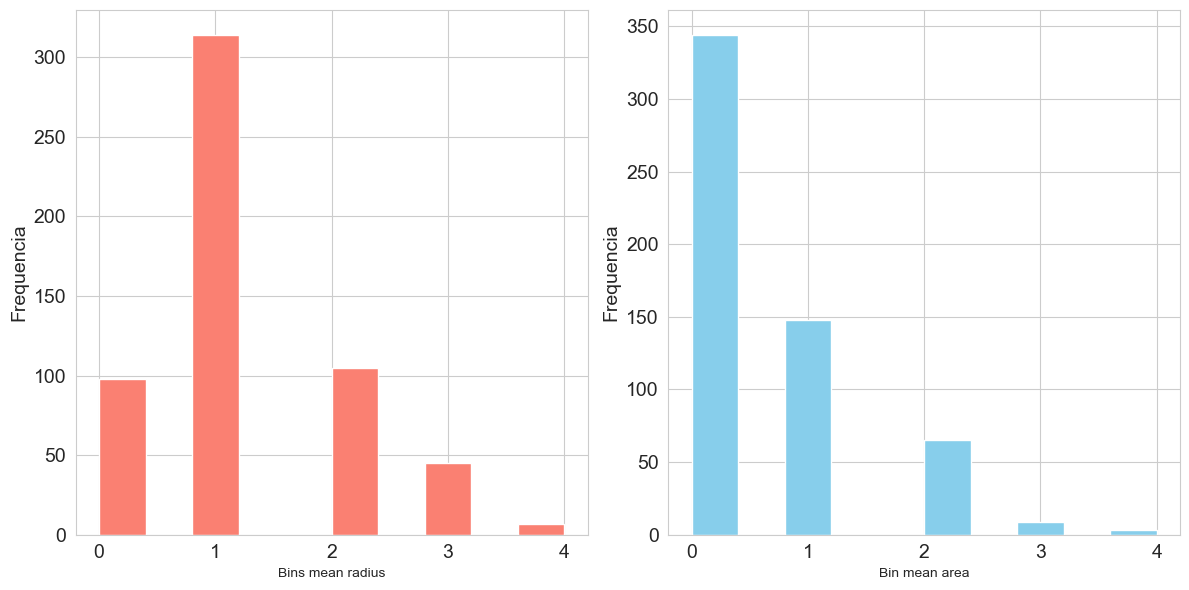

In [6]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

features_continuas['mean radius'].hist(ax=axs[0], color='salmon')
axs[0].tick_params(labelsize=14)
axs[0].set_xlabel("Bins mean radius")
axs[0].set_ylabel('Frequencia', fontsize=14)

features_continuas['mean area'].hist(ax=axs[1], color='skyblue')
axs[1].tick_params(labelsize=14)
axs[1].set_xlabel("Bin mean area")
axs[1].set_ylabel('Frequencia', fontsize=14)


plt.tight_layout()
plt.show()

#### Selecione duas features contínuas do dataset (podem ser as mesmas do item (b)) e realize a discretização dessas variáveis por meio de quantização por bins variáveis. Apresente os resultados.

In [7]:
features_continuas['mean texture'] = pd.qcut(features_continuas['mean texture'],  q=4)
features_continuas['mean perimeter'] = pd.qcut(features_continuas['mean perimeter'],  q=4)

In [8]:
print(features_continuas['mean texture'].value_counts())

mean texture
16.84    3
19.83    3
15.70    3
20.52    3
18.22    3
        ..
27.88    1
22.68    1
23.93    1
29.37    1
30.62    1
Name: count, Length: 479, dtype: int64


In [9]:
print(features_continuas['mean perimeter'].value_counts())

mean perimeter
82.61     3
134.70    3
87.76     3
129.10    2
82.69     2
         ..
142.00    1
131.20    1
108.30    1
140.10    1
68.89     1
Name: count, Length: 522, dtype: int64


### 3. Considere o breast cancer dataset.

In [9]:
features_breast_cancer = breast_cancer_df.drop(['target', 'target_name'], axis=1)

#### a. Defina uma função personalizada que realize uma normalização nas features do dataset usando FunctionTransformer do sklearn. Apresente os resultados obtidos.

In [ ]:
def normalizacao_zscore(f):
  f_normalizado = (f - f.mean(axis=0)) / f.std(axis=0)
  return f_normalizado

norm = FunctionTransformer(normalizacao_zscore)

breast_cancer_normalizado = norm.fit_transform(features_breast_cancer)
breast_cancer_normalizado.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


#### b. Utilize o PowerTransform para normalizar as features do dataset. Apresente os resultados obtidos.

In [11]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)

breast_cancer_pt = pt.fit_transform(features_breast_cancer)
breast_cancer_transformado = pd.DataFrame (breast_cancer_pt, columns=pt.get_feature_names_out())

breast_cancer_transformado.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.134881,-2.678666,1.259822,1.126421,1.504114,2.165938,1.862988,1.848558,1.953067,1.886398,...,1.619635,-1.488367,1.810506,1.652210,1.282792,1.942737,1.730182,1.935654,2.197206,1.723624
1,1.619346,-0.264377,1.528723,1.633946,-0.820227,-0.384102,0.291976,0.820609,0.102291,-0.956577,...,1.578689,-0.288382,1.430616,1.610022,-0.325080,-0.296580,0.070746,1.101594,-0.121997,0.537179
2,1.464796,0.547806,1.454664,1.461645,0.963977,1.163977,1.403673,1.683104,0.985668,-0.292433,...,1.419757,0.071406,1.321941,1.425307,0.580301,1.209701,1.005512,1.722744,1.218181,0.453955
3,-0.759262,0.357721,-0.514886,-0.836238,2.781494,2.197843,1.642391,1.423004,2.360528,2.708925,...,-0.083692,0.228089,-0.039480,-0.436860,2.857821,2.282276,1.675087,1.862378,3.250202,2.517606
4,1.571260,-1.233520,1.583340,1.595120,0.343932,0.762392,1.407479,1.410929,0.090964,-0.511332,...,1.293727,-1.637882,1.316582,1.309486,0.284367,-0.131829,0.817474,0.807077,-0.943554,-0.279402


### 4. Considere o breast cancer dataset.

#### a. Faça uma normalização das features do dataset usando o MinMaxScaler. Apresente os resultados obtidos.

In [12]:
minmax_scaler = MinMaxScaler()

features_scaled= minmax_scaler.fit_transform(features_breast_cancer)
breast_cancer_minmax = pd.DataFrame(features_scaled, columns=features_breast_cancer.columns)

breast_cancer_minmax.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


#### b. Faça o escalonamento padrão das features do dataset usando o StandardScaler. Apresente os resultados obtidos.

In [13]:
standard_scaler = StandardScaler()
 
features_standardized = standard_scaler.fit_transform(features_breast_cancer)
breast_cancer_standardized = pd.DataFrame(features_standardized, columns=features_breast_cancer.columns)

breast_cancer_standardized.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### c. Faça a regularização das features do dataset usando a norma L2. Apresente os resultados obtidos.

In [14]:
normalizer = Normalizer(norm="l2")

features_scaled = normalizer.fit_transform(features_breast_cancer)
breast_cancer_l2_norm = pd.DataFrame(features_scaled,columns=features_breast_cancer.columns)


breast_cancer_l2_norm.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,...,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,...,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,...,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,...,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


#### d. É possível aplicar simultaneamente dois ou mesmo os três métodos dos itens anteriores? Explique.

_A normalização Min-Max, o escalonamento padrão e a regularização podem ser usados juntas e, dependendo do conjunto de dados, é até recomendada a utilização simultânea dessas técnicas. Cada uma delas atua sobre aspectos diferentes do pré-processamento dos dados e não afetam diretamente uma a outra. A normalização Min-Max transforma os valores para um intervalo entre 0 e 1, com base nos valores mínimo e máximo do conjunto de dados, o escalonamento padrão transforma os dados para que tenham média 0 e desvio padrão 1 e a regularização como norma L2 evita o overfitting ao penalizar os pesos muito grandes durante o treinamento de modelos._<br> 

_Mesmo que essas técnicas não se sobrepõem, ainda é importante tomar certos cuidados ao utilizá-las em conjunto. Por exemplo, é necessário ter cuidado  na ordem de aplicação, o escalonamento ou a normalização deve ser realizado antes da regularização, além disso , se as variáveis já estiverem na mesma escala, aplicar escalonamento ou normalização pode ser desnecessário. Também se deve considerar o modelo de machine learning que será utilizado, em alguns casos, já que ao invés de ajudar podem prejudicar o desempenho do modelo._

### 5.Considere o Large Movie Review Dataset

In [15]:
reviews_train = load_files("data/aclImdb/train/")
reviews_test = load_files("data/aclImdb/test/")

text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.decode("utf-8").replace("<br />", " ") for doc in text_train]

text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.decode("utf-8").replace("<br />", " ") for doc in text_test]  


#### a. Remova as stopwords das resenhas do dataset.

In [ ]:
def remove_stopword(doc):
    stop_words = set(stopwords.words('english')) 
    features_filtradas = []
    for text in doc:
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(text)
        filtered_sentence = [w for w in tokens if not w.lower() in stop_words]
        features_filtradas.append(" ".join(filtered_sentence))
    return features_filtradas


text_train_clean = remove_stopword(text_train)
text_test_clean = remove_stopword(text_test)

#### b. Realize o stemming das expressões contidas nas features resultantes da operação realizada no item (a).

In [ ]:
def stemming(texts):
  stemmer = PorterStemmer()
  stems_words = []

  for doc in texts:
    tokens = doc.split() 
    stems = [stemmer.stem(word) for word in tokens]
    stems_words.append(" ".join(stems)) 

  return stems_words

stems_text_train = stemming(text_train_clean)
stems_text_test = stemming(text_test_clean)

#### c. Realize a lemmatization das expressões contidas nas features resultantes da operação realizada no item (a)

In [ ]:
nlp = spacy.load('en_core_web_sm')

def lemmatization(texts_list):
  lemmatized_texts = []

  for text in texts_list:
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    lemmatized_text = ' '.join(lemmatized_tokens)
    lemmatized_texts.append(lemmatized_text)

  return lemmatized_texts



In [21]:
lemma_text_train = lemmatization(text_train_clean)

In [22]:
lemma_text_test = lemmatization(text_test_clean)

#### d. Utilize a técnica de Bag-of-Words para vetorizar as resenhas do dataset resultante das operações do item (b). Apresente os resultados obtidos.

In [25]:
vectorizer = CountVectorizer()


x_train = vectorizer.fit_transform(stems_text_train)
x_test = vectorizer.transform(stems_text_test)


print(f"Conteúdo de vocabulário:\n{vectorizer.get_feature_names_out()}")


Conteúdo de vocabulário:
['00' '000' '0000000000001' ... 'østbye' 'über' 'üvegtigri']


#### e. Utilize a técnica de Bag-of-n-Grams, identificando bigrams, para vetorizar as resenhas do dataset resultante das operações do item (c). Apresente os resultados obtidos.

In [26]:
vectorizer = CountVectorizer(ngram_range=(2, 2))


x_train = vectorizer.fit_transform(lemma_text_train)
x_test = vectorizer.transform(lemma_text_test)

print(f"Conteúdo de vocabulário:\n{vectorizer.get_feature_names_out()}")


Conteúdo de vocabulário:
['00 01' '00 1991' '00 90' ... 'über berlin' 'über spy' 'üvegtigris far']


### 6. Considere o Large Movie Review Dataset (Large Movie Review Dataset)

#### a. Redimensione os dados do dataset pelo método term frequency–inverse document frequency (tf-idf). Apresente os resultados obtidos.

In [28]:
vectorizer = TfidfVectorizer()
text_train_tfidf = vectorizer.fit_transform(text_train)
text_test_tfidf = vectorizer.transform(text_test) 

max_value = text_train_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vectorizer.get_feature_names_out())
print("10 com os maiores valores de TF-IDF: \n{}".format( feature_names[sorted_by_tfidf[-10:]]))

10 com os maiores valores de TF-IDF: 
['botched' 'darkman' 'steve' 'wei' 'doodlebops' 'lupin' 'smallville'
 'scanners' 'nr' 'pokemon']


#### b. Crie um modelo de classificação baseado em regressão logística sobre a base redimensionada no item (a) e avalie os resultados obtidos

In [34]:
model = LogisticRegression(C=1, max_iter=1000)
model.fit(text_train_tfidf, y_train)

acuracia = accuracy_score(y_test, model.predict(text_test_tfidf)) * 100
print(f"Acuracia modelo de regressão logística: {acuracia:.2f}%")

Acuracia modelo de regressão logística: 88.28%


### 7. Considere o powerlifting database (powerlifting-database)

In [ ]:
df_meets = pd.read_csv("data/meets.csv")
df_meets

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge
...,...,...,...,...,...,...,...,...
8477,8477,xpc/2015-finals,XPC,2015-03-06,USA,OH,Columbus,2015 XPC
8478,8478,xpc/2016-bench-freak-show,XPC,2016-03-04,USA,OH,Columbus,2016 XPC Bench Freak Show
8479,8479,xpc/2016-elite-finals,XPC,2016-03-04,USA,OH,Columbus,2016 XPC Elite Finals
8480,8480,xpc/2016-pro-finals,XPC,2016-03-05,USA,OH,Columbus,2016 XPC PRO Finals


In [3]:
df_meets.isnull().sum()

MeetID            0
MeetPath          0
Federation        0
Date              0
MeetCountry       0
MeetState      2986
MeetTown       1509
MeetName          0
dtype: int64

In [22]:
df_meets['MeetTown'] = df_meets['MeetTown'].str.strip().str.lower()
df_meets['MeetName'] = df_meets['MeetName'].str.strip().str.lower()

df_meets['MeetState'] = df_meets['MeetState'].fillna('missing')
df_meets['MeetTown'] = df_meets['MeetTown'].fillna('missing')

In [7]:
print(df_meets['MeetPath'].value_counts())

MeetPath
xpc/2017-finals    1
365strong/1601     1
wrpf-can/1701      1
wrpf-aus/1701      1
wrpf/1714          1
                  ..
365strong/1702     1
365strong/1701     1
365strong/1605     1
365strong/1604     1
365strong/1603     1
Name: count, Length: 8482, dtype: int64


#### a. Vetorize as variáveis categóricas usando One-hot Encoding. Apresente os resultados obtidos.

In [23]:
enc = OneHotEncoder(handle_unknown='ignore')

df_features_categoricas = df_meets.drop(['MeetID', 'MeetPath', 'Date'], axis=1)
one_hot_encoded = enc.fit_transform(df_features_categoricas)

one_hot_encoded_array = one_hot_encoded.toarray()
df_meets_encoded = pd.DataFrame(one_hot_encoded_array, columns=enc.get_feature_names_out(df_features_categoricas.columns))

df_meets_encoded

,Federation_365Strong,Federation_AAPF,Federation_AAU,Federation_ADFPA,Federation_APA,Federation_APC,Federation_APF,Federation_AsianPF,Federation_BB,Federation_BP,...,MeetName_åpent stevne i benkpress,MeetName_åpent stevne i styrkeløft,MeetName_åpent stevne i styrkeløft og benkpress,MeetName_åpent stevne markløft utstyrsfritt,MeetName_åpent stevne styrkeløft,MeetName_åpent stevne styrkeløft utstyrsfritt,MeetName_åpent stevne utstyrsfritt,MeetName_åpent stevne/klubbmesterskap,MeetName_åpent utstyrsfritt stevne,MeetName_ås klubbstevne
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### b. Vetorize as variáveis categóricas usando Dummy Coding. Compare os resultados desta vetorização com aqueles obtidos no item (a).

In [ ]:
df_meets_dumming = pd.get_dummies(df_features_categoricas, drop_first=True).astype(int)

df_meets_dumming

,Federation_AAPF,Federation_AAU,Federation_ADFPA,Federation_APA,Federation_APC,Federation_APF,Federation_AsianPF,Federation_BB,Federation_BP,Federation_BPU,...,MeetName_åpent stevne i benkpress,MeetName_åpent stevne i styrkeløft,MeetName_åpent stevne i styrkeløft og benkpress,MeetName_åpent stevne markløft utstyrsfritt,MeetName_åpent stevne styrkeløft,MeetName_åpent stevne styrkeløft utstyrsfritt,MeetName_åpent stevne utstyrsfritt,MeetName_åpent stevne/klubbmesterskap,MeetName_åpent utstyrsfritt stevne,MeetName_ås klubbstevne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


_Usar o getdummy com 'dropfirst=True' fez com que o dataframe criado apartir dessa vetorização tivesse um pouco menos de colunas do que o criado com a técnica do One Hot Enconding do Sklean, visto que esse parâmetro remove uma coluna por variável categórica._

#### c. Vetorize as variáveis categóricas usando Effect Coding. Compare os resultados desta vetorização com aqueles obtidos nos itens (a) e (b).

In [ ]:
import category_encoders as ce

effect_enc = ce.SumEncoder(cols=df_features_categoricas)
df_meets_effect = effect_enc.fit_transform(df_features_categoricas)


df_meets_effect

,Federation_0,Federation_1,Federation_2,Federation_3,Federation_4,Federation_5,Federation_6,Federation_7,Federation_8,Federation_9,...,MeetName_5143,MeetName_5144,MeetName_5145,MeetName_5146,MeetName_5147,MeetName_5148,MeetName_5149,MeetName_5150,MeetName_5151,MeetName_5152
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


_Assim como no Dummy Coding, o Effect Encoding cria menos colunas que o One Hot Encoding, com a diferença de que a categoria de referência recebe -1 em vez de 0. Essa tecnica acaba sendo pouco usada por ser menos intuitivo que as outras duas._

#### d. Explique com suas palavras quais são as vantagens e as desvantagens de se realizar a vetorização de variáveis categóricas de um dataset.

_Muitos algoritmos de aprendizado de máquina aceitam apenas variáveis numéricas como entrada, entretanto muitos conjuntos de dados contêm informações importantes em variáveis categóricas.Por isso, a principal vantagem da vetorização é permitir que essas informações sejam usadas em modelos de machine learning, preservando seu conteúdo. Por outro lado, a vetorização também apresenta algumas desvantagens, como a perda de interpretabilidade, já que os dados são convertidos em números, o aumento da dimensionalidade, já que muitas técnicas criam múltiplas subcategorias, e o risco de distorções na representação dos dados._

### 8. Considere ainda o powerlifting database.

#### a. Compacte as features categóricas da base de dados usando Feature Hashing.

In [26]:
df_variaveis_categoricas = df_meets.drop(['MeetID', 'Date'], axis=1).astype(str)

for col in df_variaveis_categoricas:
  print(f"{col}: {df_meets[col].nunique()} categorias únicas")

MeetPath: 8482 categorias únicas
Federation: 60 categorias únicas
MeetCountry: 45 categorias únicas
MeetState: 81 categorias únicas
MeetTown: 1520 categorias únicas
MeetName: 5154 categorias únicas


In [30]:
from sklearn.feature_extraction import FeatureHasher

hasher = FeatureHasher(n_features=2**15, input_type='dict')
hashed_features = hasher.transform(df_variaveis_categoricas.to_dict(orient='records'))

hashed_features_array = hashed_features.toarray()
print(hashed_features_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### b. Compacte as features categóricas da base de dados usando Bin Counting.

In [ ]:
df_meets_bin_counted = df_variaveis_categoricas.copy()

for col in df_variaveis_categoricas:
  counts = df_meets_bin_counted[col].value_counts(normalize=True)
  df_meets_bin_counted[col + '_count'] = df_meets_bin_counted[col].map(counts)

df_meets_bin_counted = df_meets_bin_counted.drop(columns=df_variaveis_categoricas)
df_meets_bin_counted

,MeetPath_count,Federation_count,MeetCountry_count,MeetState_count,MeetTown_count,MeetName_count
0,0.000118,0.001651,0.45909,0.006956,0.000589,0.000118
1,0.000118,0.001651,0.45909,0.007663,0.000118,0.000118
2,0.000118,0.001651,0.45909,0.006956,0.000589,0.000236
3,0.000118,0.001651,0.45909,0.004126,0.000354,0.000118
4,0.000118,0.001651,0.45909,0.004126,0.000354,0.000118
...,...,...,...,...,...,...
8477,0.000118,0.001768,0.45909,0.019571,0.005541,0.000118
8478,0.000118,0.001768,0.45909,0.019571,0.005541,0.000118
8479,0.000118,0.001768,0.45909,0.019571,0.005541,0.000118
8480,0.000118,0.001768,0.45909,0.019571,0.005541,0.000118
